# Job Skills Analysis

In [88]:
# import os
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%run utils.ipynb

### Load data

In [89]:
path = 'D:/Learn/projects/data/job_data/apify'
date = '01152025'
type = 'fin'
df = pd.read_csv(f'{path}/{date}_linkedin_{type}_ai_salary.csv')
print(df.shape)
df.head()

(661, 29)


,title,companyName,salary,location,applyUrl,contractType,description,experienceLevel,jobUrl,publishedAt,...,max_hourly_salary,min_yearly_salary,max_yearly_salary,required_degree,prefered_degree,is_remote,required_skills,preferred_degree,avg_hourly_salary,avg_yearly_salary
0,"Financial Director, Private Equity",Atlantic Group,"$200,000.00/yr - $250,000.00/yr","New York, United States",https://www.linkedin.com/jobs/view/financial-d...,Full-time,"Our Client, A top tier PE firm is looking to h...",Executive,https://www.linkedin.com/jobs/view/financial-d...,2025-01-16,...,NaN,200000.0,250000.0,BS,MS,not remote,"['finance', 'accounting', 'GAAP', 'financial r...",NaN,NaN,225000.0
1,Sr Manager of Strategic Finance,Palo Alto Networks,NaN,"Santa Clara, CA",https://www.linkedin.com/jobs/view/sr-manager-...,Full-time,Our Mission\n\nAt Palo Alto Networks® everythi...,Mid-Senior level,https://www.linkedin.com/jobs/view/sr-manager-...,2025-01-16,...,NaN,140000.0,226500.0,BS,MBA,not remote,"['analytical', 'financial modeling', 'Excel', ...",NaN,NaN,183250.0
2,Chief Financial Officer,"Piping Technology & Products, Inc.",NaN,"Houston, TX",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Overview\n\nPiping Technology & Produc...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,NaN,NaN,NaN,NaN,not remote,"['financial leadership', 'ERP systems', 'chang...",NaN,NaN,NaN
3,Chief Financial Officer,LHH,"$190,000.00/yr - $210,000.00/yr",New York City Metropolitan Area,https://www.linkedin.com/jobs/view/chief-finan...,Full-time,We are working with the CEO of a SaaS start-up...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,190000.0,210000.0,BS,MS,not remote,"['Accounting', 'FP&A', 'Fundraising', 'Modelli...",NaN,NaN,200000.0
4,Chief Financial Officer,National Vision Inc.,NaN,"Upland, CA",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Description\n\nNational Vision is one ...,Not Applicable,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,140000.0,161000.0,BS,MS,not remote,"['financial operations', 'regulations', 'compl...",NaN,NaN,150500.0


### Exam the charasteristics of the dataset

In [90]:
df[df['required_skills'].isna()]

,title,companyName,salary,location,applyUrl,contractType,description,experienceLevel,jobUrl,publishedAt,...,max_hourly_salary,min_yearly_salary,max_yearly_salary,required_degree,prefered_degree,is_remote,required_skills,preferred_degree,avg_hourly_salary,avg_yearly_salary
421,FINANCIAL MANAGEMENT ANALYST,Naval Air Warfare Center Training Systems Divi...,"$101,401.00/yr - $131,826.00/yr","Patuxent River, MD",https://navair.yellogov.com/jobs/4UDbc0qh0SLN-...,Full-time,Position Description\n\nYou will serve as a Fi...,Mid-Senior level,https://www.linkedin.com/jobs/view/financial-m...,2025-01-16,...,NaN,101401.0,131826.0,NaN,NaN,not remote,NaN,NaN,NaN,116613.5


In [91]:
# df['required_skills'].apply(type)

In [92]:
## split lists of skills to single skill rows
df2 = df[df['required_skills'].notna()].copy()
df2['required_skills'] = df2['required_skills'].apply(eval)
df2['required_skills'].info()

<class 'pandas.core.series.Series'>
Index: 660 entries, 0 to 660
Series name: required_skills
Non-Null Count  Dtype 
--------------  ----- 
660 non-null    object
dtypes: object(1)
memory usage: 10.3+ KB


### Convert lists of skills into a dataframe where each skill in it's own column

In [93]:
# tranform the lists of required skills to rows of single skill
exploded_df = df2.explode('required_skills')
# standardize all letters to lower, generate clean skill names, use preprocess_text later
# # remove all non-letter characters
exploded_df['cleaned_required_skills'] = exploded_df['required_skills'].apply(preprocess_text)
exploded_df = exploded_df[exploded_df['cleaned_required_skills'].notna()].copy()
exploded_df.head()
skill_counts = exploded_df.groupby(['cleaned_required_skills']).size().reset_index(name='count')

In [94]:
exploded_df['cleaned_required_skills'].info()

<class 'pandas.core.series.Series'>
Index: 3539 entries, 0 to 660
Series name: cleaned_required_skills
Non-Null Count  Dtype 
--------------  ----- 
3539 non-null   object
dtypes: object(1)
memory usage: 55.3+ KB


In [95]:
exploded_df['cleaned_required_skills'].head(20)

0                 finance
0              accounting
0                    gaap
0     financial reporting
0         cash management
1              analytical
1      financial modeling
1                   excel
1                     fpa
2    financial leadership
2              erp system
2       change management
2           collaboration
3              accounting
3                     fpa
3             fundraising
3               modelling
3                     erp
4     financial operation
4              regulation
Name: cleaned_required_skills, dtype: object

In [96]:
skill_counts

,cleaned_required_skills,count
0,account analysis,1
1,account management,1
2,account payable,9
3,account payable process,1
4,account receivable,3
...,...,...
796,writing,2
797,writing skill,1
798,written communication,2
799,written skill,1


In [97]:
exploded_df.to_csv('exploded_df.csv')
# skill_counts.to_csv('skill_count.csv')

There are a lot of similar names in the skill column, which makes the analysis difficult. I can think of two ways to deal with the messy skill counts:
1. use word counts to find the most frequent words
2. use clustering technique to group similar words together
3. use fuzzwuzzy library to fuzzy match similar words 

In [98]:
# exploded_df = pd.read_csv('exploded_df.csv', index_col=[0])
# exploded_df.head()

### 1. word counts

In [99]:
# join all words together
all_text = ' '.join(exploded_df['cleaned_required_skills'].dropna().astype(str))
# Split the text into individual words and count occurrences
word_counts = Counter(all_text.split())
# convert to a dataframe
word_count_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count']).reset_index()
word_count_df.rename(columns={'index': 'word'}, inplace=True)

# Sort the DataFrame by count in descending order
word_count_df = word_count_df.sort_values(by='count', ascending=False).reset_index(drop=True)

In [100]:
word_count_df.to_csv('skill_word_count.csv')

In [101]:
word_count_df.head(20)

,word,count
0,financial,422
1,management,316
2,communication,283
3,analysis,241
4,accounting,170
5,skill,157
6,leadership,137
7,excel,131
8,analytical,109
9,data,107


Some general words can be removed, like data, analysis, skills etc.

Some words are similar, can be added.

Some neighbouring words are definitely together, like machine and learning, power and bi, I can pick the lower count.

In [102]:
# drop_words = ['data', 'skill', 'skills', 'learning', 'bi', 'analytical', 'business', 'microsoft', 'project', 'tools', 'etl']
# rename_rows = {'machine': 'machine learning', 'power': 'power bi', 'analysis': 'data analysis', 'science': 'data science'}
drop_words = ['skill', 'skills']
word_count_df.drop(word_count_df[word_count_df['word'].isin(drop_words)].index, inplace=True)
# word_count_df.replace(rename_rows, inplace=True)
word_count_df.head(20)

,word,count
0,financial,422
1,management,316
2,communication,283
3,analysis,241
4,accounting,170
6,leadership,137
7,excel,131
8,analytical,109
9,data,107
10,reporting,104


In [103]:
word_count_df.to_csv('skill_word_count2.csv')

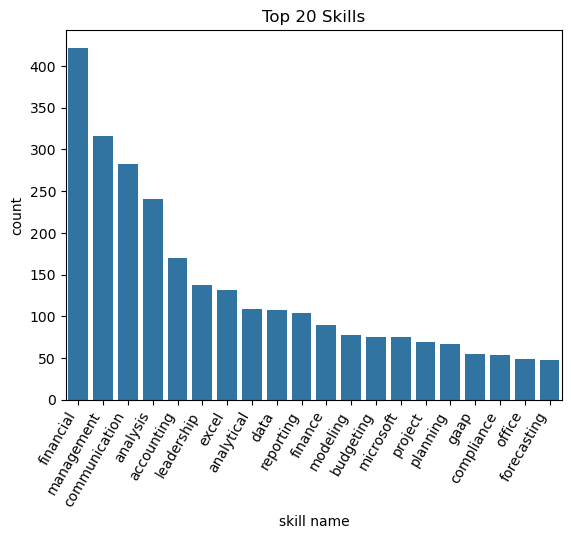

In [104]:
# visualize top 20 in demanding skills
def plot_top_skill(df, col):
    ax = sns.barplot(data=df.head(20), x=col, y='count', errorbar=None)
    format_plot(ax, title='Top 20 Skills', xlabel='skill name', ylabel='count')
    plt.savefig("skill_word_count.png", dpi=300, bbox_inches="tight")
    plt.show()

plot_top_skill(word_count_df, 'word')

### 2. K-means Clustering

In [105]:
exploded_df = pd.read_csv('exploded_df.csv', index_col=[0])
# exploded_df.head()

In [106]:
exploded_df['cleaned_required_skills'].info()

<class 'pandas.core.series.Series'>
Index: 3539 entries, 0 to 660
Series name: cleaned_required_skills
Non-Null Count  Dtype 
--------------  ----- 
3539 non-null   object
dtypes: object(1)
memory usage: 55.3+ KB


In [107]:
# %run job_utils.ipynb
exploded_df['cluster'] = KMeans_words(n=100, df=exploded_df['cleaned_required_skills'])
grouped_skills = exploded_df.groupby(['cluster'])['cleaned_required_skills'].apply(list).reset_index()
grouped_skills

,cluster,cleaned_required_skills
0,0,"[financial report, report preparation, report ..."
1,1,"[accounting, accounting, accounting, accountin..."
2,2,"[management, management, management, managemen..."
3,3,"[communication, communication, communication, ..."
4,4,"[analysis, analysis, analysis, analysis, analy..."
...,...,...
95,95,"[quantitative skill, quantitative, quantitativ..."
96,96,"[drug treatment knowledge, drug treatment, dru..."
97,97,"[budget, budget management, budget development..."
98,98,"[stakeholder engagement, stakeholder reporting..."


In [108]:
# %run job_utils.ipynb
grouped_skills['count'] = grouped_skills['cleaned_required_skills'].apply(len)
grouped_skills['most_freq_skill'] = grouped_skills['cleaned_required_skills'].apply(most_frequent_word)
grouped_skills

,cluster,cleaned_required_skills,count,most_freq_skill
0,0,"[financial report, report preparation, report ...",9,financial report
1,1,"[accounting, accounting, accounting, accountin...",139,accounting
2,2,"[management, management, management, managemen...",26,management
3,3,"[communication, communication, communication, ...",259,communication
4,4,"[analysis, analysis, analysis, analysis, analy...",36,analysis
...,...,...,...,...
95,95,"[quantitative skill, quantitative, quantitativ...",12,quantitative skill
96,96,"[drug treatment knowledge, drug treatment, dru...",5,drug treatment
97,97,"[budget, budget management, budget development...",19,budget management
98,98,"[stakeholder engagement, stakeholder reporting...",8,stakeholder management


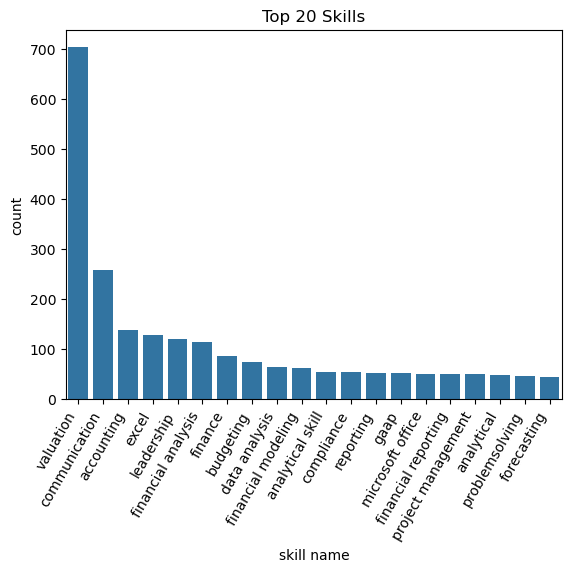

In [109]:
top_skills = grouped_skills.groupby(['most_freq_skill'])['count'].sum().reset_index()
top_skills = top_skills.sort_values(by='count', ascending=False).head(20)

plot_top_skill(top_skills, col='most_freq_skill')

In [110]:
exploded_df['cleaned_required_skills'].info()

<class 'pandas.core.series.Series'>
Index: 3539 entries, 0 to 660
Series name: cleaned_required_skills
Non-Null Count  Dtype 
--------------  ----- 
3539 non-null   object
dtypes: object(1)
memory usage: 184.3+ KB


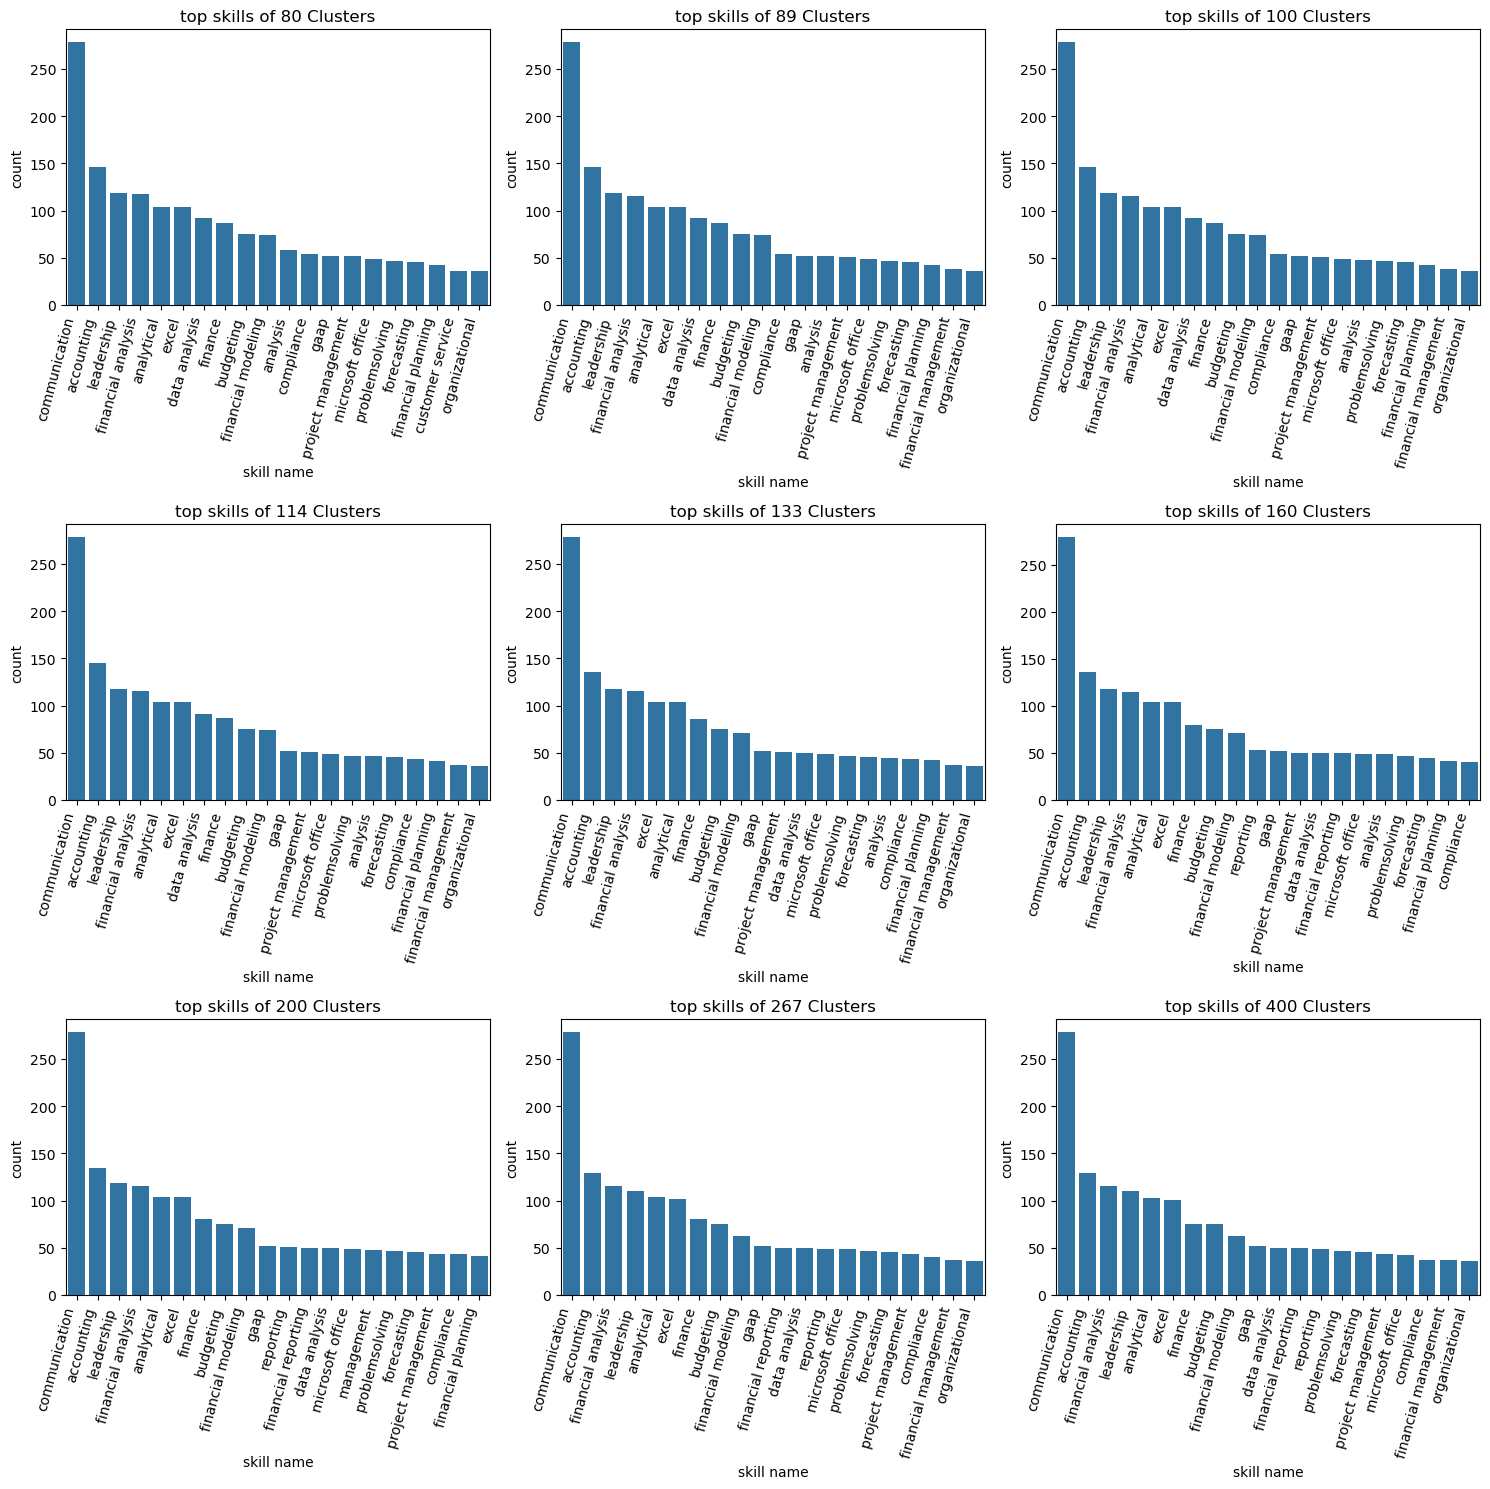

In [111]:
# %run utils.ipynb
tune_num_clusters(exploded_df)

In [118]:
top_skills_cluster = get_top_skills(100, exploded_df, threshold_percentage=50)

The solutions listed above works well, and looks like the number of clusters doesn't matter much for the top 20 skills. The threshold solution works the best. 

### Group the Skill Names by Fusszy Match 

In [112]:
exploded_df = pd.read_csv('exploded_df.csv', index_col=[0])

In [113]:
# Apply the function on the 'skills' column to group similar skills
grouped_skills = skills_fuzzymatch(exploded_df['cleaned_required_skills'], threshold=80)

# Add a new column for grouped skills
exploded_df2 = exploded_df[exploded_df['cleaned_required_skills']!='etl'].copy()
exploded_df2['grouped_skill'] = exploded_df2['cleaned_required_skills'].apply(lambda row: assign_group(row, grouped_skills))

exploded_df2['grouped_skill']

0                  finance
0               accounting
0                     gaap
0      financial reporting
0               management
              ...         
660     financial analysis
660             accounting
660          communication
660         problemsolving
660             leadership
Name: grouped_skill, Length: 3539, dtype: object

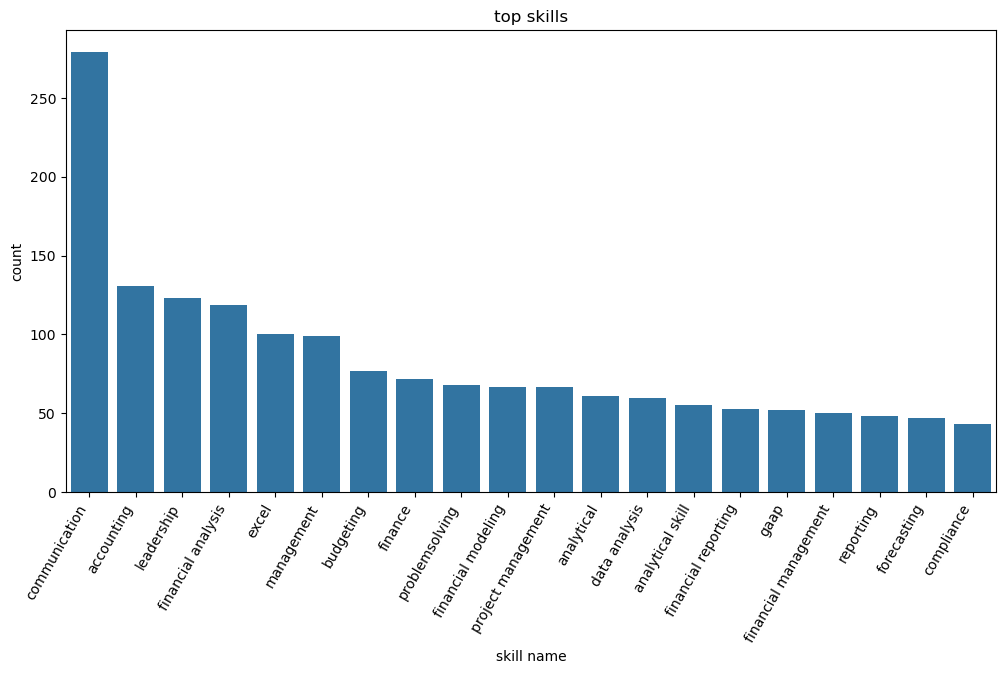

In [114]:
# %run utils.ipynb
top_skills_fuzzymatch = plot_fuzzy_match(exploded_df2)

Compare all three methods

In [116]:
print(word_count_df.columns)
print(top_skills.columns)
print(top_skills_fuzzymatch.columns)

Index(['word', 'count'], dtype='object')
Index(['most_freq_skill', 'count'], dtype='object')
Index(['grouped_skill', 'count'], dtype='object')


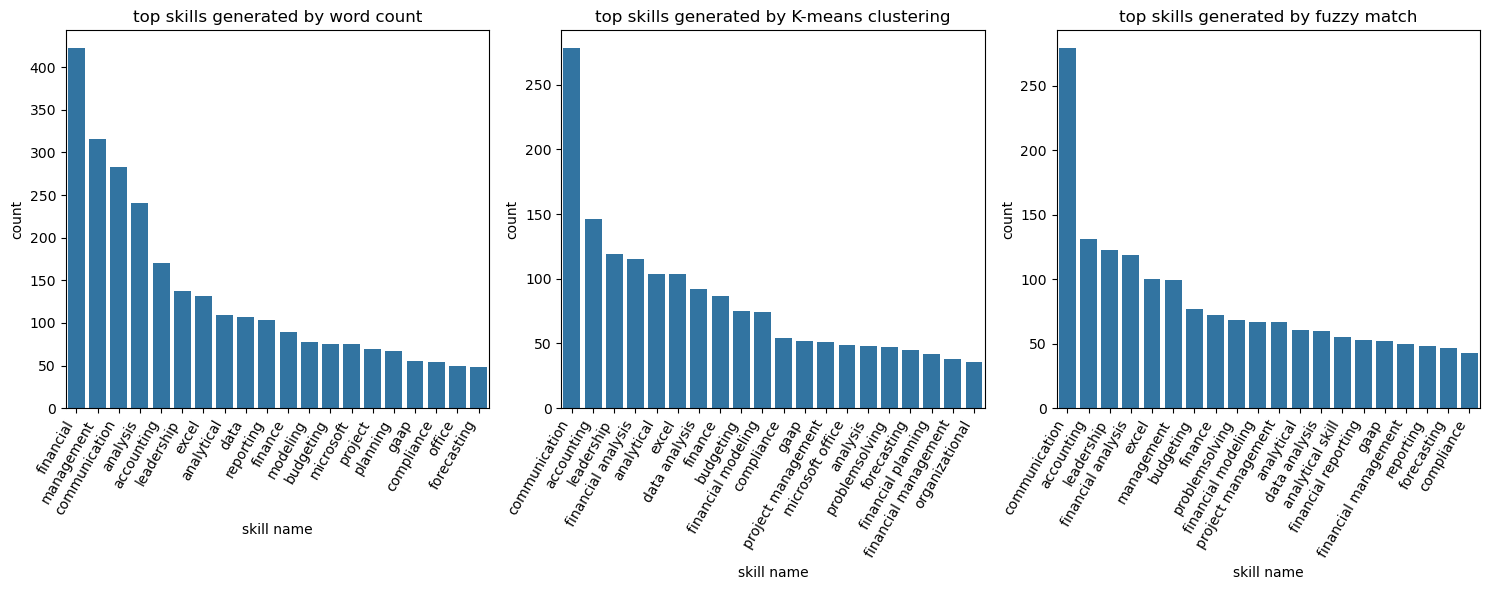

In [119]:
# compare three methods that consolidate similar skill names
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sns.barplot(data=word_count_df.head(20), x='word', y='count', ax=axes[0])
sns.barplot(data=top_skills_cluster.head(20), x='most_freq_skill', y='count', ax=axes[1])
sns.barplot(data=top_skills_fuzzymatch, x='grouped_skill', y='count', ax=axes[2])

method_list = ['word count', 'K-means clustering', 'fuzzy match']
for ax, method in zip(axes, method_list):
    format_plot(ax, title='top skills generated by '+method, xlabel='skill name')

plt.savefig('skills_compare_three.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()